In [ ]:
# !pip uninstall tf-keras
# !pip install tensorflow==2.16.1

In [1]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 3.4.1 Tensorflow Current Version: 2.16.1


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf


# **Task 1: Use MinMaxScaler in the 'preprocess_data' Function**

* Don't forget to import MinMaxScaler in the Import section.

* Use MinMaxScaler as a scaler in the 'preprocess_data' function.

* Then make the train validation distinction.

# **Task 1 Solution**

We added the relevant library for **MinMaxScaler** to the top of this notebook. And we split our dataset 1:5 using the '**train_test_split**' function in the sklearn library.

In [3]:
def preprocess_data(filepath):
  data = pd.read_csv(filepath)
  scaler = MinMaxScaler()
  X = scaler.fit_transform(data.drop("Outcome", axis=1))
  y = data["Outcome"]

  return X, y

X, y = preprocess_data("diabetes.csv")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

print("X_train shape:", X_train.shape)

X_train shape: (614, 8)


# **Task 2: Create Tensorflow Dataset for Train Set and Validation Set.**

Only the dataset should be created. Shuffle and batch operations should not be done here.

# **Task 2 Solution**

In [4]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

# **Task 3: Examine Observation 1 of 'val_dataset'.**

Tensorflow datasets could not be displayed directly via certain methods (e.g.: head(), df[:5]).

# **Task 3 Solution**

In [6]:
for features, label in val_dataset.take(1):
    print('Features:', features.numpy(), 'Label:', label.numpy())

Features: [0.35294118 0.46231156 0.50819672 0.32323232 0.14893617 0.47690015
 0.0029889  0.41666667] Label: 0


As you can see, the **features** and *label* values ​​are printed to the screen. According to the values ​​in the output, **features** consist of a continuous series of (float) numbers and **label** contains a single numeric label as the target value of the task.

# **Task 4: Format the Train and Validation Sets so that 'buffer_size' is the size of the entire data set and the Batch is 32. Let's not forget that we only applied Batch for the Validation Set.**

# **Task 4 Solution**

In [17]:
print("Dataset Size:", len(X_train))

Dataset Size: 614


In [9]:
train_dataset = train_dataset.shuffle(buffer_size=614).batch(32)

val_dataset = val_dataset.batch(32)

Both **shuffle** and **batch** operations are performed on the training data set. **Only batch operations are performed on the validation set**. **Shuffle operation is not needed here**. The reason for this is as follows;

Performing a shuffle operation on the data set during training, that is, randomizing the data order, is important for the model to generalize better. **This reduces overfitting**. The sequential nature of the training data can cause the model to get used to this order, which increases the risk of overfitting. Working with randomly sorted data prevents the model from developing a sequential dependency. In addition, the shuffle operation helps the model learn the true distribution of the data by ensuring that the data is processed in a different order for each epoch. In other words, it allows **the model to generalize better**.

Shuffle operation is not performed during validation because the validation process aims to evaluate the performance of the model on untrained data. Processing the data in the validation set in the same order without changing the order makes the results of each validation process more consistent. This means seeing the same data in the same order each time; thus, variable results resulting from different orders are avoided. In other words, performing evaluation on validation data without shuffle operation is a more accurate method to measure how the model generalizes to data it has not learned.

# **Task 5: Examine 1 Observation for Validation Set. 10. What are the Feature Values ​​of Batch? What is the Label Value? Proceed by counting one by one.**

# **Task 5 Solution**

In [15]:
for features, labels in val_dataset.take(1):
    print('Features:', features.numpy())
    print('Labels:', labels.numpy())

Features: [[0.35294118 0.46231156 0.50819672 0.32323232 0.14893617 0.47690015
  0.0029889  0.41666667]
 [0.29411765 0.66331658 0.6557377  0.         0.         0.39940387
  0.04611443 0.8       ]
 [0.17647059 0.53266332 0.59016393 0.         0.         0.38450075
  0.05508113 0.1       ]
 [0.23529412 0.49748744 0.55737705 0.38383838 0.         0.48882265
  0.02860803 0.2       ]
 [0.23529412 0.48241206 0.45901639 0.17171717 0.05791962 0.3099851
  0.1118702  0.08333333]
 [0.05882353 0.45226131 0.50819672 0.18181818 0.06973995 0.37406855
  0.50811272 0.06666667]
 [0.35294118 0.73869347 0.6557377  0.         0.         0.43964232
  0.04269855 0.48333333]
 [0.29411765 0.71859296 0.63934426 0.         0.         0.67064083
  0.04782237 0.43333333]
 [0.29411765 0.68844221 0.8852459  0.         0.         0.72727273
  0.06362084 0.26666667]
 [0.35294118 0.61809045 0.59016393 0.45454545 0.27186761 0.50074516
  0.27967549 0.21666667]
 [0.29411765 0.         0.6557377  0.32323232 0.         0.61

Since the batch process was performed here, the values ​​​​are different from each other.

In [16]:
print('Features:', features[9].numpy())
print('Labels:', labels[9].numpy())

Features: [0.35294118 0.61809045 0.59016393 0.45454545 0.27186761 0.50074516
 0.27967549 0.21666667]
Labels: 0


# **Task 6: Retrain the Model in the Lesson with 100 Epoch Numbers and Interpret the Loss and Accuracy Values. Perform All Operations in a Single Cell.**

# **Task 6 Solution**

In [18]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5811 - loss: 0.6825 - val_accuracy: 0.6558 - val_loss: 0.6580
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6455 - loss: 0.6545 - val_accuracy: 0.6623 - val_loss: 0.6517
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6396 - loss: 0.6497 - val_accuracy: 0.6558 - val_loss: 0.6480
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6660 - loss: 0.6280 - val_accuracy: 0.6558 - val_loss: 0.6411
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6817 - loss: 0.6235 - val_accuracy: 0.6494 - val_loss: 0.6362
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6359 - loss: 0.6380 - val_accuracy: 0.6494 - val_loss: 0.6338
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6491 - loss: 0.6362 - val_accuracy: 0.6558 - val_loss: 0.6253
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6808 - loss: 0.6073 - val_accuracy: 0.6558 - 

In [19]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7988 - loss: 0.4694 
Validation Loss: 0.44481316208839417
Validation Accuracy: 0.8051947951316833


**Values ​​obtained in the course:**
* Validation Loss: 0.59
* Validation Accuracy: 0.70

**Values ​​obtained as a result of Task 6**
* Validation Loss: 0.44
* Validatin Accuracy: 0.80

Result: Let's remember the changes we made. We scaled the data with **MinMaxScaler**. Then we shuffled the training set using **shuffle** and set the **'buffer_size'** value to the size of the dataset.

As a result of the changes we made, we see a significant increase in the performance of the model. While the **validation loss decreased**, the **validation accuracy value increased**.

It helps the model to have a more stable and efficient learning process by ensuring that the data is in a more similar range in different features. Here, the data pulled between 0 and 1 with **MinMaxScaler** prevents the model from being overly sensitive to certain features, providing a balanced learning process. In addition, scaled data generally provides faster convergence, meaning it can help the model reach the optimum more quickly and consistently. This helps to reduce validation loss and increase accuracy.

Performing a **shuffle operation** on the training data prevents the model from being dependent on the data order, thus increasing its generalization ability. Randomly sorted data allows the model to see different data in different orders at each epoch, thus the model tends to generalize more deeply rather than memorizing sequential or consecutive features. This can be particularly effective in increasing the accuracy rate.

**Setting buffer_size to the dataset size** ensures that the entire dataset is randomly sorted during the shuffle operation. This provides complete randomness that cannot be achieved with a smaller buffer_size. Thus, the model sees the entire training data as fully shuffled and achieves more reliable generalization. In other words, buffer_size adjusted to the dataset size reduces the risk of overfitting the model by better shuffling the data during the training process and contributes to reducing validation loss.




# **Task 7: Build a Model with 5 Layers and Neuron Numbers of 32, 64, 128, 256, 512 Respectively and Evaluate the Results. There Should Be No Change in Other Features.**

# **Task 7 Solution**

In [20]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6286 - loss: 0.6724 - val_accuracy: 0.6494 - val_loss: 0.6353
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6853 - loss: 0.6171 - val_accuracy: 0.6623 - val_loss: 0.5942
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7038 - loss: 0.5730 - val_accuracy: 0.6818 - val_loss: 0.5919
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7135 - loss: 0.5560 - val_accuracy: 0.5584 - val_loss: 0.6648
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6407 - loss: 0.5700 - val_accuracy: 0.6948 - val_loss: 0.5539
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7309 - loss: 0.5545 - val_accuracy: 0.6753 - val_loss: 0.7019
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7163 - loss: 0.5943 - val_accuracy: 0.7013 - val_loss: 0.5215
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7403 - loss: 0.5270 - val_accuracy: 0.5

In [21]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7892 - loss: 0.7346 
Validation Loss: 0.6694652438163757
Validation Accuracy: 0.798701286315918


In the first model architecture, we used a simpler structure. In the second model architecture, we increased the number of layers and neurons significantly. This increased the capacity and complexity of the model. Although we used a more complex structure in the second model, the performance of the model on the validation data did not increase to the expected level. In fact, we can say that the model tends to overfit because the validation loss increases. This means that the model cannot generalize to new data even though it learns the features in the training data.

# **Task 8: I wonder if it would be beneficial if we increased the number of epochs? Let's try it with 1000 epochs. Let's interpret the results.**

# **Task 8 Solution**

In [22]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=1000,
                    validation_data=(X_val, y_val))

Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6814 - loss: 0.6717 - val_accuracy: 0.6494 - val_loss: 0.6462
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6619 - loss: 0.6238 - val_accuracy: 0.6494 - val_loss: 0.6487
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6467 - loss: 0.6142 - val_accuracy: 0.6948 - val_loss: 0.5552
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7052 - loss: 0.5649 - val_accuracy: 0.6688 - val_loss: 0.7166
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7247 - loss: 0.5818 - val_accuracy: 0.7078 - val_loss: 0.5534
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7243 - loss: 0.5310 - val_accuracy: 0.7208 - val_loss: 0.5062
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7414 - loss: 0.5043 - val_accuracy: 0.7532 - val_loss: 0.4852
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7388 - loss: 0.5365 - val_accuracy:

In [23]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7177 - loss: 2.6967 
Validation Loss: 2.2708122730255127
Validation Accuracy: 0.7337662577629089


After the new update, the Validation Loss in the model has increased significantly. This indicates that the model is overfitting. Also, the Validation Accuracy metric has dropped to a lower level of 0.73. This indicates that it is not able to generalize well on the validation data.

# **Tensor Dataset**

**What is a tensor dataset?**

TensorFlow’s data processing API that makes it easy to work with large datasets. Tensor datasets provide a powerful and flexible structure, especially when preparing a dataset for training deep learning models.

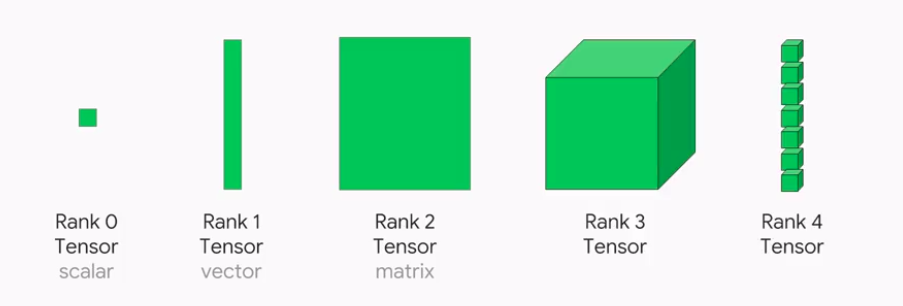



A tensor is a data structure that represents multidimensional arrays and is used to perform various mathematical operations. It is critical for representing and processing data in deep learning libraries such as TensorFlow. Tensors can represent a wide range of data, from numbers to images, and are a fundamental building block in deep learning applications.

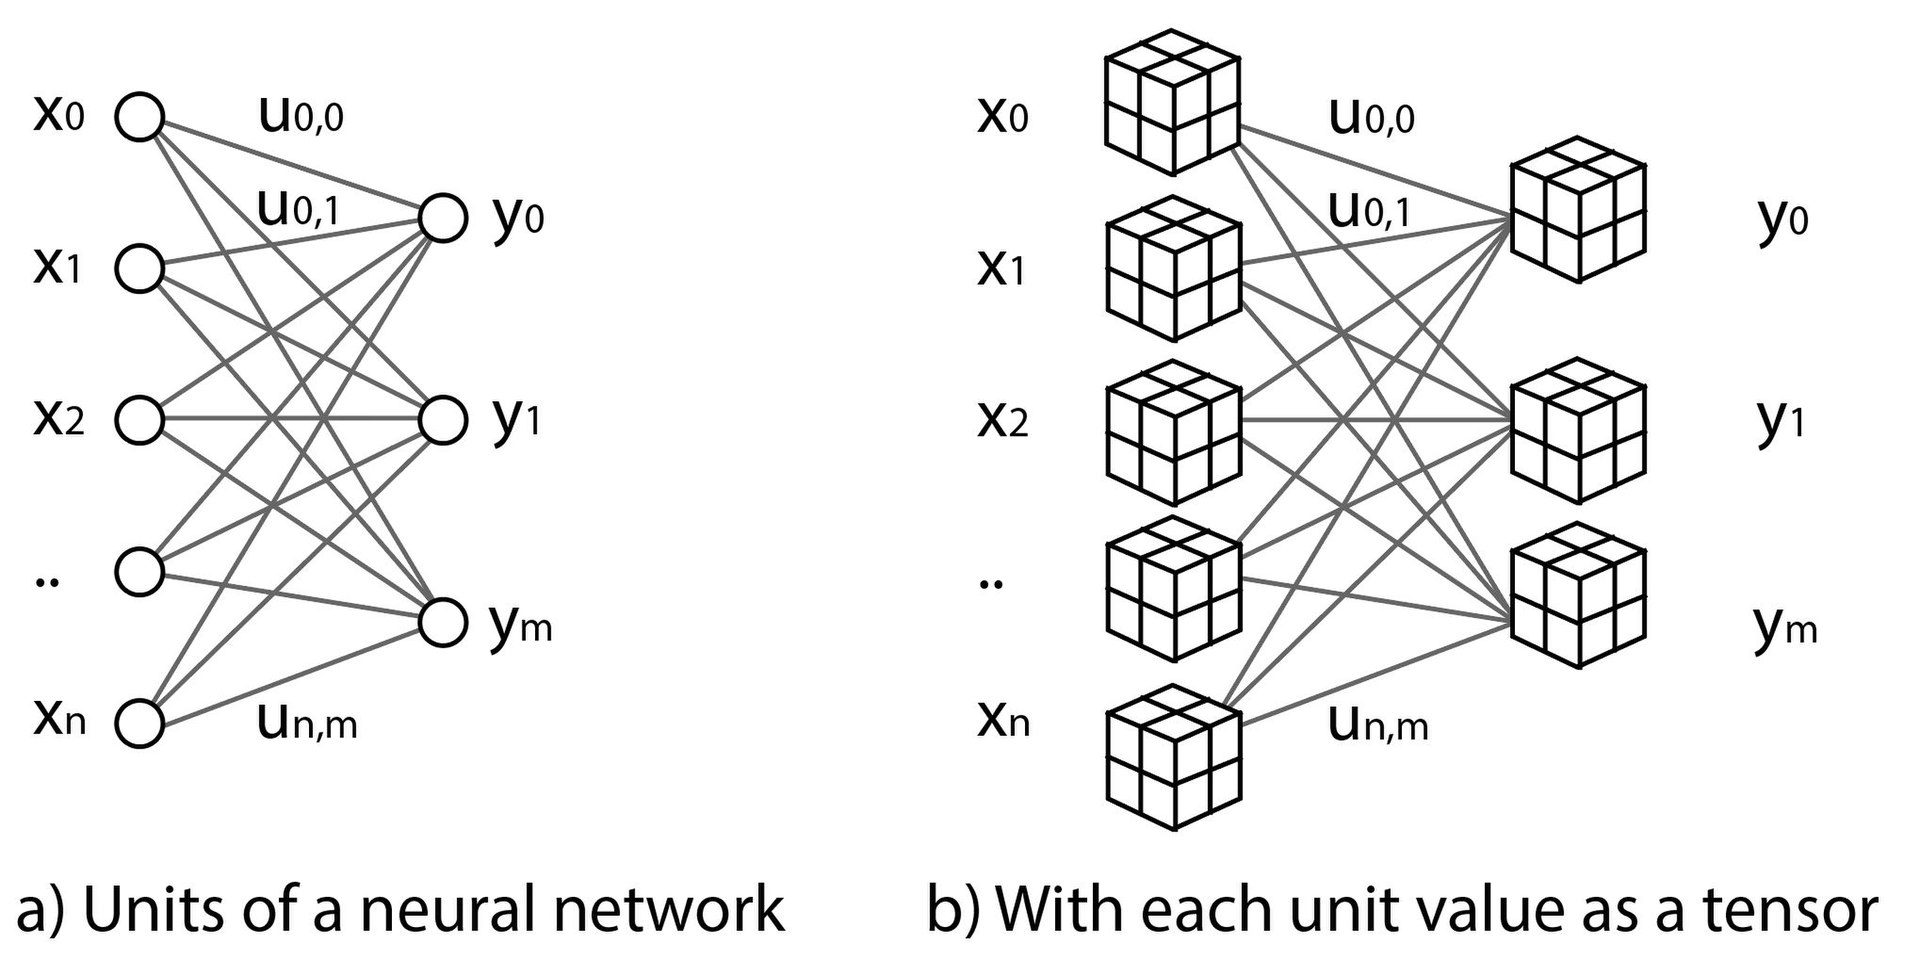